In [8]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
df = pd.read_csv("Wage.csv") #Reads wages file containing data
v = df.values
age_exp = v[:,:2] #Array of Features(age, experience)
income = v[:,2] #Array of Label(Income)
print(age_exp)
print(income)

[[25  1]
 [30  3]
 [47  2]
 [32  5]
 [43 10]
 [51  7]
 [28  5]
 [33  4]
 [37  5]
 [39  8]
 [29  1]
 [47  9]
 [54  5]
 [51  4]
 [44 12]
 [41  6]
 [58 17]
 [23  1]
 [44  9]
 [37 10]]
[30450 35670 31580 40130 47830 41630 41340 37650 40250 45150 27840 46110
 36720 34800 51300 38900 63600 30870 44190 48700]


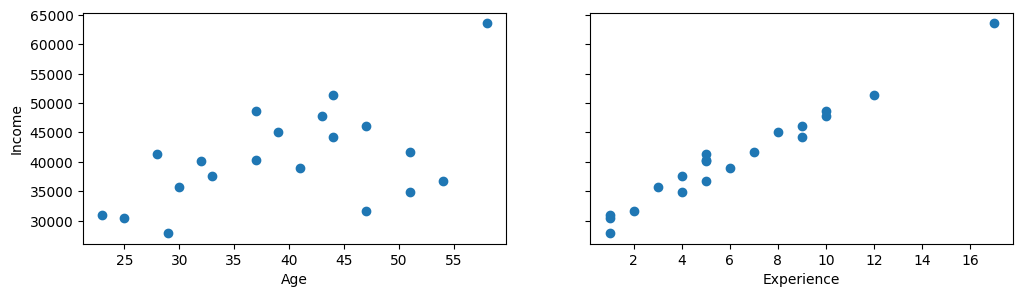

In [13]:
X_features = ['Age','Experience']
fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(age_exp[:,i],income)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Income")
plt.show()

In [27]:
def zscore_normalize_features(x):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(x, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(x, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    x_norm = (x - mu) / sigma      

    return (x_norm, mu, sigma)

In [37]:
features_norm, features_mu, features_sigma = zscore_normalize_features(age_exp)
print(features_mu)
print(features_norm)

[39.65  6.2 ]
[[-1.49890262 -1.29354835]
 [-0.98733176 -0.79602975]
 [ 0.75200916 -1.04478905]
 [-0.78270342 -0.29851116]
 [ 0.34275248  0.94528533]
 [ 1.16126585  0.19900744]
 [-1.1919601  -0.29851116]
 [-0.68038924 -0.54727045]
 [-0.27113256 -0.29851116]
 [-0.06650421  0.44776674]
 [-1.08964593 -1.29354835]
 [ 0.75200916  0.69652603]
 [ 1.46820837 -0.29851116]
 [ 1.16126585 -0.54727045]
 [ 0.44506665  1.44280393]
 [ 0.13812413 -0.04975186]
 [ 1.87746506  2.68660041]
 [-1.70353096 -1.29354835]
 [ 0.44506665  0.69652603]
 [-0.27113256  0.94528533]]


In [29]:
#Calculates the cost of the current model with the given parameters (m, c)
def compute_cost(x,y,m,c): 
    l,w = x.shape #Number of items(l), Number of features(w)
    avg_cost = 0
    for i in range(l):
        prediction = np.dot(x[i], m) + c
        avg_cost += (prediction - y[i]) ** 2
    avg_cost /= (2 * l)
    
    return avg_cost

In [30]:
#Calculates the predicted values given parameters(m, c)
def prediction(x,m,c):
    p = np.dot(x,m) + c
    return p

In [31]:
#Calculates the predicted values given parameters(m, c)
def predictions(x,m,c):
    l,w = x.shape
    val = np.zeros((l))
    for i in range(l):
        val[i] = np.dot(x[i],m) + c
    return val

In [100]:
#Computes the derivative of the cost for given paramteres(m,c)
def compute_gradient(x,y,m,c):
    l,w = x.shape
    d_m = np.zeros((w,)) #Derivative in regards of m
    d_c = 0 #Derivative in regards of c
    
    for i in range(l):
        val = (np.dot(x[i],m) + c) - y[i]
        for j in range(w):
            d_m[j] += val * x[i,j] 
        d_c += val
        
    d_m /= l
    d_c /= l
    
    return d_m, d_c

In [125]:
#Model which calculates the values of parameters(m, c) which result in the lowest cost possible
def gradient_descent(x, y, m_init, c_init, alpha, iterations, gradient_function, cost_function):
    m = copy.deepcopy(m_init)
    c = c_init
    cost_history = []
    for i in range(iterations):
        d_m, d_c = gradient_function(x, y, m, c)
        m = m - alpha * d_m
        c = c - alpha * d_c
    
        #if(i % math.ceil(iterations/10) == 0):
        cost_history.append(cost_function(x, y, m , c) / 100000)
            
        
    return m, c, cost_history

In [126]:
#parameters
m_init = np.zeros(2)
c_init = 0
alpha = 0.1
iterations = 100000
w, c, cost_history = gradient_descent(features_norm, income, m_init, c_init, alpha, iterations, compute_gradient, compute_cost)
print(w,c)

[-969.51725787 8692.75726857] 40735.49999999997


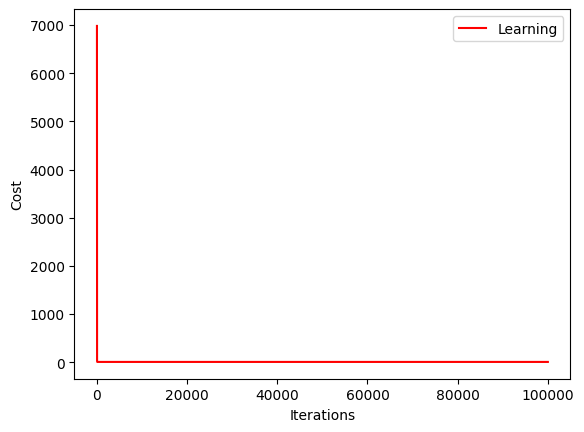

In [127]:
its = np.arange(100000).reshape(-1,1)
plt.plot(its, cost_history, c="r", label = "Learning")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [96]:
#testing correctness
# First, normalize out example.
x_person = np.array([51, 4])
x_person_norm = (x_person - features_mu) / features_sigma
print(x_person_norm)
x_person_predict = np.dot(x_person_norm, w) + c
print(f" predicted income of a person who is 51 years old ,and has 4 years of experience = ${x_person_predict}")

[ 1.16126585 -0.54727045]
 predicted income of a person who is 51 years old ,and has 4 years of experience = $34852.343493282344


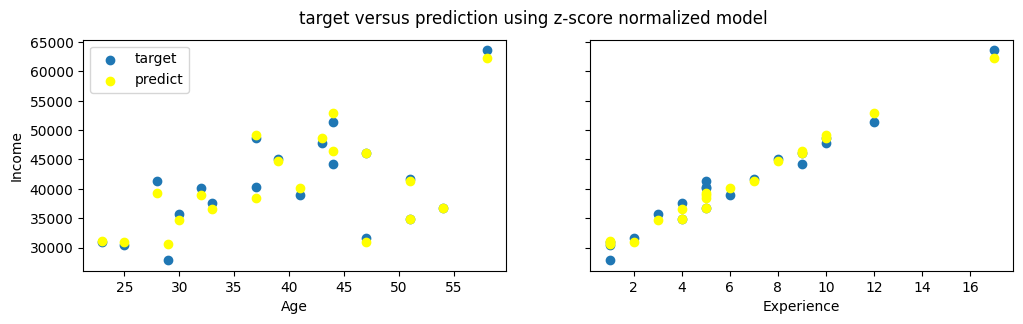

In [97]:
#predict target using normalized features
m = features_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(features_norm[i], w) + c

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,2,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(age_exp[:,i],income, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(age_exp[:,i],yp,color="yellow", label = 'predict')
ax[0].set_ylabel("Income"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [98]:
#calculates average cost of current (m, c) parameter values
res = compute_cost(features_norm, income, w, c)
print(res)

766816.9893570893


In [99]:
line = predictions(features_norm,w,c)
print(line)

[30944.2101595  34773.04176604 30924.31653128 38899.45943896
 48620.33148851 41339.55606905 39296.24086081 36637.85989158
 38403.48266166 44692.30452651 30547.42873765 46061.14587474
 36717.16161882 34852.34349328 52845.9445169  40169.10543174
 62269.23050006 31142.60087042 46358.73194113 49215.50362128]
